<a href="https://colab.research.google.com/github/williamshiaogit/DL-ML-AI-learning/blob/master/make_xtrain_numpy_array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2

# # path = "/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/"

# img_array = np.array(Image.open('/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/name_ans/可愛/3Iu18rJ.jpg'))
# # plt.imshow(img_array)
# # plt.show()
# # print(img_array)

# # 存圖但是跑不動 不能存.csv
# # 儲存圖片為array
# img = cv2.imread('/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/name_ans/可愛/3Iu18rJ.jpg')# 這是BGR圖片
# print(img)
# cv2.imwrite('examples2.csv', img) #[:,:,::-1] ::-1做的是反向 BGR -> RGB # 這裡用BGR圖片儲存，但是pylab或PIL讀入的圖片都是RGB的
# # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # cv2.imwrite('examples_gray.png', img_gray)

In [ ]:
import os
import json
import glob
from PIL import Image

folders = glob.glob("/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/*")
path = glob.glob("/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/")
# try_open_img = folders + df["slug/imgs"]
with open( "/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/tags.json" ) as json_file:
    datas = json.load(json_file)
try_open_img=[]
for folder in folders[:]:

    for data in datas:
        tag_slug = data['slug'].replace('.','_')
    for img in glob.glob(folder+'/*.jpg'): # folder 下的所有 img
        img = img.split('/')[-1]
        try_open_img.append([tag_slug+"/"+img])

        for i in try_open_img:
            print(i[0])
            Image.open(path+i[0])
            # try:
            #     Image.open(path+i)
            #     print("開啟成功")
            # except:
            #     # os.remove(i)
            #     print("!!!", i)
# 卡爆了 這裡 從這裡開始改

M_1595784520_A_98C/KrTd6Dj.jpg


TypeError: ignored

In [ ]:
import glob
import pandas as pd
# tags.json 裡的資料
import json

with open( "/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/tags.json" ) as json_file:
    datas = json.load(json_file)
folders = glob.glob("/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/*")
# 找到 folder 名稱跟 data slug 一樣

tags_dict_init = {'低關注': 0, '可愛': 0, '塑膠': 0, '巨乳': 0, '普通': 0, '漂亮': 0}
tags_average = []
imgs = []
classes = [ tag for tag in tags_dict_init.keys() ]


for folder in folders:  
  tags_dict = tags_dict_init
  for data in datas:
    tag_slug = data['slug'].replace('.','_')
    folder_name = folder.split('/')[-1]
    if folder_name == tag_slug:
      # print(tag_slug)
      # print(folder_name)
      for tag, score in data['tags_average'].items():
        tags_dict[tag] = score
      for img in glob.glob(folder+'/*.jpg'): # folder 下的所有 img
        img = img.split('/')[-1]
        # print(img, tags_dict)
        imgs.append([tag_slug+"/"+img])
        tags_average.append(list(tags_dict.values()))
        

imgs_df = pd.DataFrame(imgs, columns=['slug/imgs'])
tags_average_df = pd.DataFrame(tags_average, columns=classes)
df = pd.concat([imgs_df, tags_average_df],axis=1)
df

,slug/imgs,低關注,可愛,塑膠,巨乳,普通,漂亮
0,M_1596101351_A_7C3/fKLWwSx.jpg,0.5,0.0,0.0,0.1,0.0,0.4
1,M_1596101351_A_7C3/fqHMfBd.jpg,0.5,0.0,0.0,0.1,0.0,0.4
2,M_1596101351_A_7C3/inRJD8r.jpg,0.5,0.0,0.0,0.1,0.0,0.4
3,M_1596101351_A_7C3/AxkQaoy.jpg,0.5,0.0,0.0,0.1,0.0,0.4
4,M_1596101351_A_7C3/ZGaEvLV.jpg,0.5,0.0,0.0,0.1,0.0,0.4
...,...,...,...,...,...,...,...
1105,M_1595779267_A_D9E/Gnpm6Xu.jpg,0.7,0.1,0.1,0.1,0.2,0.2
1106,M_1595779267_A_D9E/zzIc1t9.jpg,0.7,0.1,0.1,0.1,0.2,0.2
1107,M_1595779267_A_D9E/W5fMZCz.jpg,0.7,0.1,0.1,0.1,0.2,0.2
1108,M_1595779267_A_D9E/xaOvJ9e.jpg,0.7,0.1,0.1,0.1,0.2,0.2


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

path = glob.glob("/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/")
x = np.array(path + df["slug/imgs"])
y = np.array(tags_average)
# y = np.array(df["低關注"]) append(np.array(df["可愛"])) # df["塑膠"], df["巨乳"], df["普通"], df["漂亮"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train)
print(y_train)

['/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1595829088_A_DCF/Nbu1Pye.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1596000954_A_F6C/8TBd8Iu.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1596074741_A_821/LI8hu9r.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1595790839_A_0ED/F0f1KWJ.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1595751669_A_A85/A1P5KwR.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1595792600_A_12A/tx0ALZj.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1596038219_A_B0D/rfQaVmp.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1595846915_A_01E/L1WdeSe.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1595755359_A_F51/kEFiaJG.jpg'
 '/content/drive/My Drive/109Tibame/專題-人型人臉裁切/py執行/test01_cut_photos/M_1595784520_A_98C/5Mn

In [ ]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
imgx_train = []
gg = 0
for i in x_train[:]:
    imgx_train = Image.open(i)
    # imgx_train = cv2.imread(i)[:,:,::-1] # ::-1 做的是反向 BGR -> RGB
plt.imshow(imgx_train)
np.array(imgx_train)


UnidentifiedImageError: ignored

((874, 599, 3), (512, 512, 3))

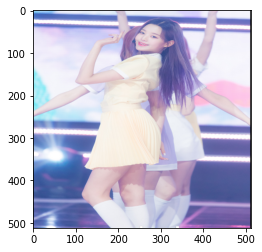

In [ ]:
# # 先不用resize 用maxpooling試試看
# # Resize img
# IMG_SIZE = 512
# img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
# plt.imshow(img_resized)
# img.shape, img_resized.shape

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1104,)
(123,)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
layers = [
    # 3 * 3 * 3(一個過濾器) * 64(個) + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個過濾器) * 128(個) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),    
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    AveragePooling2D(pool_size=(28,28), strides=(28,28), padding='same'),
    Dense(6, activation="relu"),
    Dropout(0.25),
    Dense(6, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 256)        